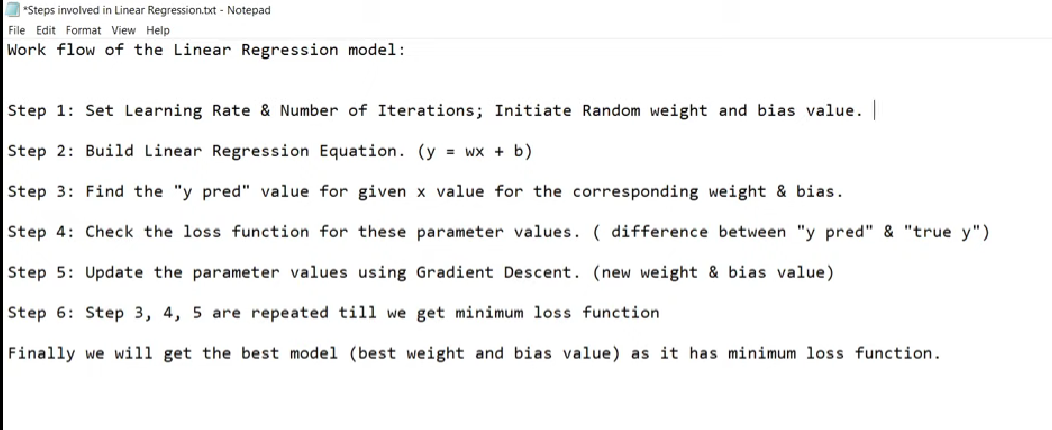

In [1]:
import numpy as np

model parameters : parameters we cannot give and are given by model.

hyper parameters : parameters given by us.

In [2]:
brr =[]
arr =[]
class LinearRegression():
#     initaing parametres.
    def __init__(self , learning_rate , no_of_iteration):
        self.learning_rate = learning_rate
        self.no_of_iteration = no_of_iteration
        
    #fitting the data in model.
    def fit(self ,X ,y):
    #no. of datapoints in dataset --> m.
    #no. of input features in dataset --> n.        
        self.m , self.n = X.shape
        
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y
        
#         implemeting gradient descendent
        for i in range(self.no_of_iteration):
           self.update_weights()
            
    def update_weights(self):
        y_pred = self.predict(self.X)
        
        #calculate gradient.
        dw = -(2*(self.X.T).dot(self.y - y_pred))/self.m
        
        db = -2*np.sum(self.y - y_pred)/self.m
        
        #updating weights.
        
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db
        arr.append(self.w)
        brr.append(self.b)
         

    def predict(self,X):
        return X.dot(self.w) + self.b

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df = pd.read_csv('~/system/vs/jupyter/dataset/Salary_dataset.csv')
df.head()
# df.tail()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
df.shape

(30, 3)

In [6]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [7]:
X = df[['YearsExperience']].values
# df.iloc[:,:-1].values ==> takes only 1st column.
y = df['Salary'].values
# df.iloc[:,1].values ==> takes 2nd column.

In [8]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.3)

## training Linear regression model.

In [9]:
print(X_train,y_test)

[[ 1.2]
 [ 2.3]
 [ 5.2]
 [ 3. ]
 [ 4.2]
 [ 4.1]
 [ 8. ]
 [ 1.4]
 [ 1.6]
 [ 9.1]
 [ 2.1]
 [ 7.2]
 [ 9.6]
 [ 6. ]
 [10.6]
 [ 6.9]
 [ 3.3]
 [ 4. ]
 [ 4.6]
 [ 6.1]
 [ 3.1]] [112636.  67939. 113813.  83089.  64446.  57190. 122392. 109432.  56958.]


In [10]:
model = LinearRegression(learning_rate = 0.02,no_of_iteration = 100)
model.fit(X_train, y_train)

In [11]:
np.shape(brr)

(100,)

In [24]:
len(arr)

100

In [13]:
brr

[2842.333333333333,
 2253.841458793651,
 2701.8308523696087,
 2833.4644217235464,
 3058.452213981854,
 3252.741842379721,
 3453.923043657056,
 3650.6343423838725,
 3846.3382365770663,
 4040.007795505196,
 4231.975449518867,
 4422.161769407608,
 4610.611857073361,
 4797.3329090604675,
 4982.343409888177,
 5165.658236304027,
 5347.293169983383,
 5527.263532642376,
 5705.584601078228,
 5882.27148316838,
 6057.3391570950735,
 6230.8024611241135,
 6402.676098342392,
 6572.974636850323,
 6741.712511315779,
 6908.9040241009425,
 7074.563346503851,
 7238.7045199507065,
 7401.341457188725,
 7562.487943464578,
 7722.157637693088,
 7880.364073614896,
 8037.120660943615,
 8192.440686502443,
 8346.337315350367,
 8498.823591898043,
 8649.912441013454,
 8799.61666911743,
 8947.948965269135,
 9094.9219022416,
 9240.547937587402,
 9384.839414694576,
 9527.808563832856,
 9669.467503190317,
 9809.828239900526,
 9948.902671060277,
 10086.702584738003,
 10223.239660972931,
 10358.525472765106,
 10492.57148

In [16]:
for i in range (1,):
  print(arr[0])

[16809.78990476]


In [17]:
# list1 =["hello","World","!!"]
# list2 =["hello","Aaditya","!!!"]
# list3= list1+list2
# # print(list3)

In [18]:
print(model.w[0],model.b)

10768.282724369392 15839.35075426691


In [19]:
ypred=model.predict(X_test)
ypred

array([120291.69318065,  69680.76437611, 105216.09736653,  73988.07746586,
        51374.68374469,  56758.82510687, 127829.49108771, 110600.23872872,
        59989.30992418])

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
mean_squared_error(y_test , ypred)

47726895.3808203

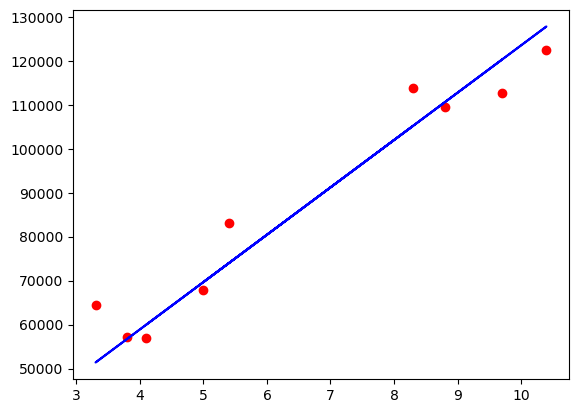

In [22]:
plt.scatter(X_test , y_test,c='r')
plt.plot(X_test , ypred , c='b')

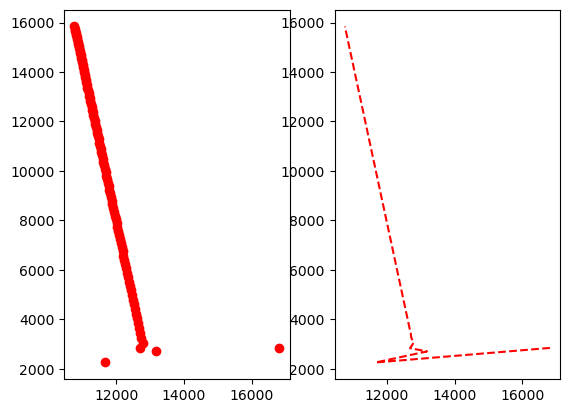

In [23]:
plt.subplot(1,2,1)
plt.scatter(arr , brr,c='r')
plt.subplot(1,2,2)
plt.plot(arr , brr,c='r',linestyle='--')